Домашнее задание №1
====



In [1]:
# Импортируем нужные нам библиотеки
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")

In [9]:
# Загружаем датасет, с которым мы будем работать
df = pd.read_csv('../datatest/bike-sharing.csv')

In [10]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,0.2879,0.75,0.0,0,1,1


Задание
====
Для тех же данных, что мы рассмотрели на лекции (bike sharing), сделать следующее:
* Выбрать самостоятельно уровень агрегации (день, неделя, месяц, год), а так же функцию агрегации (среднее, сумма, максимум). 
* Построить базовую наивную модель
* В этот раз применить принцип кросс-валидации для временных рядов, используя выбранную метрику ($R^2$, MSE, MAE, MRSE).




# Решение

In [11]:
df = df[['dteday','cnt']]

In [12]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [13]:
df = df.set_index('dteday')

In [14]:
df = df.resample('W').sum()

<AxesSubplot:xlabel='dteday'>

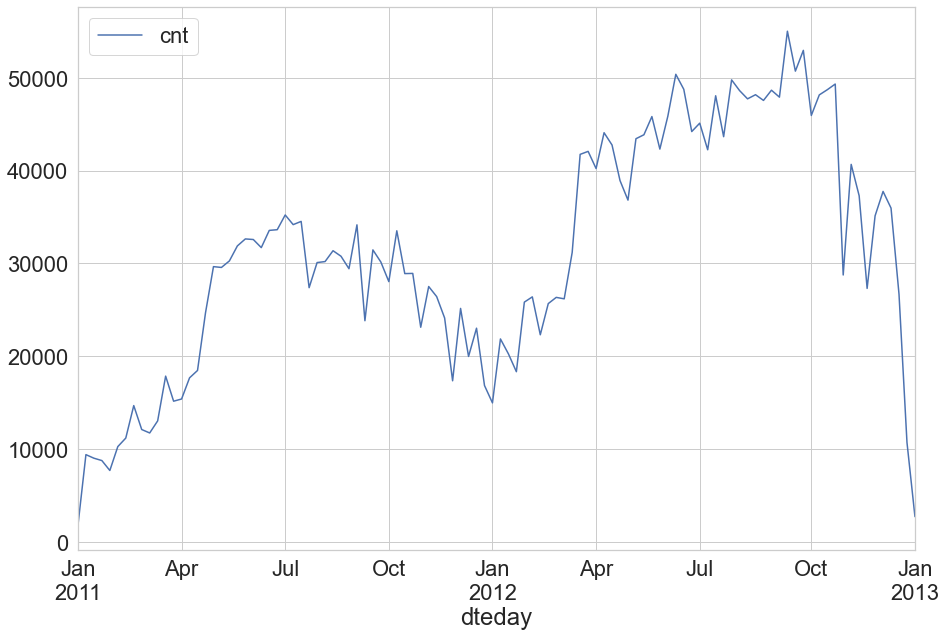

In [15]:
df.plot()

In [16]:
s = pd.Series(index = df.index,
             data= df['cnt'].values)

In [17]:
y_hat = list()
y_hat.append(np.nan)

In [18]:
for i in range(1,len(s)):
    y_hat.append(s.values[i-1])

In [19]:
s_hat = pd.Series(index=s.index,
                 data=y_hat)

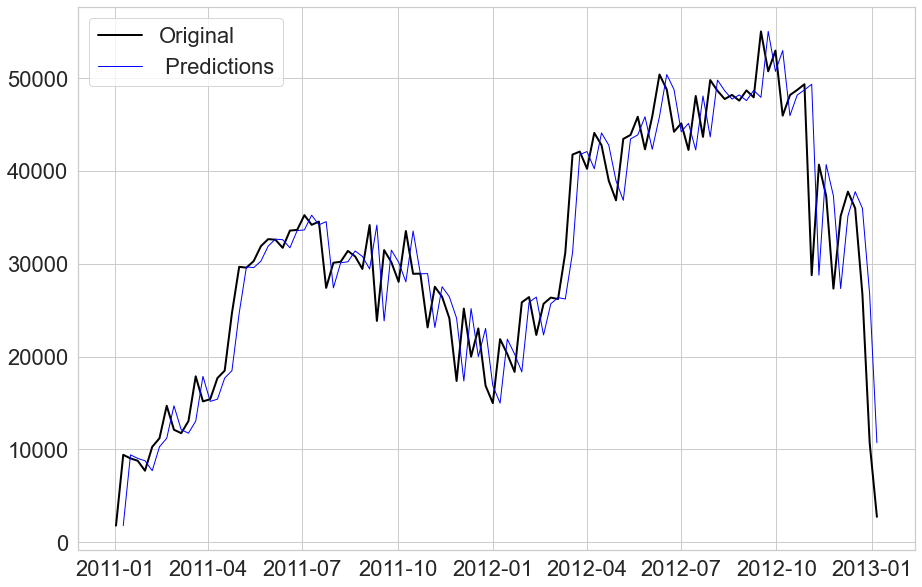

In [20]:
fig, ax = plt.subplots()
ax.plot(s, linewidth = 2, color='black',label = 'Original')
ax.plot(s_hat, linewidth = 1, color = 'blue', label =' Predictions')
ax.legend()
plt.show()

In [21]:
df['cnt_hat'] = s_hat
df.dropna(inplace=True)

In [22]:
print('MSE = ', mean_squared_error(df['cnt'],df['cnt_hat']))
print('MAE = ', mean_absolute_error(df['cnt'],df['cnt_hat']))
print('R2 = ', r2_score(df['cnt'],df['cnt_hat']))

MSE =  24431088.2
MAE =  3505.057142857143
R2 =  0.8429861806549633


# Кросс-валидация

In [101]:
df = pd.read_csv('../datatest/bike-sharing.csv')

In [102]:
df = df[['dteday','cnt']]

In [103]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [104]:
df = df.set_index('dteday')

In [105]:
df = df.resample('W').sum()

In [106]:
from sklearn.model_selection import TimeSeriesSplit

def train_model(df):
    y_hat = np.array(np.nan)
    
    for i in range(1,len(df)):
        y_hat = np.append(y_hat, df[i-1])
        
    return y_hat


X = df.values
splits = TimeSeriesSplit(n_splits=5)

errors = []

for train_index, test_index in splits.split(X):
    predictions = train_model(X[test_index])[1:]
    actual = X[test_index][1:]
    error = mean_absolute_error(predictions, actual)
    errors.append(error)

print('Cross-validation MAE:', np.mean(np.array(errors)))

Cross-validation MAE: 3874.75
